<a href="https://colab.research.google.com/github/Material-Educativo/Inteligencia-artificial-aplicada/blob/main/Clustering/Explorando_NFL_Filtrado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Comparación de peso y altura
Existen varias creencias comunes sobre los jugadores de fútbol americano en la NFL. Por ejemplo, se considera que dentro de la línea defensiva, los jugadores en las posiciones de nose tackle, el defensive tackle y el defensive end, son los más pesados debido a su función, que requiere enfrentar y detener a los adversarios de frente con gran fuerza física. En contraste, los jugadores en posiciones defensivas como cornerbacks, defensive backs y safeties tienden a ser más ligeros.

Para analizar qué tan cierta es la afirmación anterior se decidió conseguir información de jugadores de diferentes posiciones en la NFL. En la plataforma Kaggle se encuentra disponibe la base de datos “NFL Statistics”.   Disponible en:

https://www.kaggle.com/datasets/kendallgillies/nflstatistics/data


Esta base de datos contiene muchos datos sobre jugadores de la NFL. Sin embargo, para los propósitos de este ejercicio se conservaron sólo la altura y el peso de jugadores en las posiciones antes mencionadas. El resultado se guardó en un archivo llamado NFL_Filtrado.csv. Disponible en:

https://drive.google.com/file/d/1Cv1_jNmsVT4C9KQ1Mls9r0PJxWVzzvlt/view?usp=sharing

#Exploración de los datos
Lo primero que haremos será cargar la información y explorar los datos para tratar de entender lo que tenemos.

Primero importamos las bibliotecas que serán empleadas.

Se usará pandas para poder leer y manipular la información del archivo en formato csv, matplotlib para poder mostrar las figuras que se generen y seaborn para generar un diagrama de dispersión.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

A continuación leemos el archivo csv usando pandas y desplegamos los primeros cinco renglones con la función head().

Recuerda que deberás cambiar la ruta para que el programa encuentre el documento en tu drive.

Observa que el dataframe tiene una columna para altura, otra para peso y finalmente una que indica la posición del jugador asociado a cada muestra.

In [ ]:
# Enlace del archivo CSV en Google Drive
# Especifica la ruta en tu Google Drive donde quieres guardar el archivo CSV
ruta_csv = "/content/drive/MyDrive/Material Academico/Inteligencia artificial Diplomado/Notebooks/NFL_Filtrado.csv"

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv(ruta_csv)

#Imprimir la información del dataframe
print(df.head())

   Height (inches)  Weight (lbs) Position
0               77           305       DE
1               72           210       DB
2               74           190       CB
3               74           208       CB
4               72           212       FS


Para saber cuáles son las posiciones que se están considerando en este archivo, se puede usar la función $unique()$ sobre la columna “Position”, como se muestra en el Cuadro 3.  Al imprimir el resultado se verán las siglas: DE, DB, CB, FS, DT, NT.

In [ ]:
# Obtener una muestra de cada abreviatura en la columna "Position"
positions = df['Position'].unique()
print(positions)

['DE' 'DB' 'CB' 'FS' 'DT' 'NT']


Ahora vamos a analizar la relación entre las posiciones de los jugadores y su peso mediante un diagrama de dispersión. Para esto, primero clasificaremos las posiciones en dos grupos:

*   Grupo 1: Incluye las posiciones DE, DT y NT
*   Grupo 2: Incluye todas las demás posiciones

En la celda siguiente creamos una lista llamada grupo1 que contiene las posiciones del Grupo 1. Luego, añadimos una nueva columna al DataFrame llamada “Grupo”. Esta columna se llena utilizando una función lambda que asigna el valor 'Grupo1' si la posición en la columna “Position” pertenece a la lista grupo1, y “Grupo2” en caso contrario.


In [ ]:
# Definir los grupos de posiciones y sus colores
grupo1 = ['DE', 'DT', 'NT']
grupo2 = ['CB', 'DB', 'FS']

# Crear una nueva columna en el DataFrame para el grupo
df['Grupo'] = df['Position'].apply(lambda x: 'Grupo1' if x in grupo1 else 'Grupo2')

# Veamos los primeros cinco renglones
df.head()

,Height (inches),Weight (lbs),Position,Grupo
0,77,305,DE,Grupo1
1,72,210,DB,Grupo2
2,74,190,CB,Grupo2
3,74,208,CB,Grupo2
4,72,212,FS,Grupo2


Finalmente con la siguiente celda vamos a generar un diagrama de dispersión para visualizar la relación entre la altura y el peso de los jugadores, diferenciados por grupos.

Primero se configura el tamaño de la figura que va a contener el gráfico con plt.figure(figsize=(12, 8)). Después se crea el diagrama de dispersión con seaborn, sns.scatterplot(...).

Los puntos del gráfico representan la altura ('Height (inches)') en el eje x y el peso ('Weight (lbs)') en el eje y. Los puntos están coloreados según el grupo al que pertenecen ('Grupo'), con Grupo1 en azul y Grupo2 en naranja.


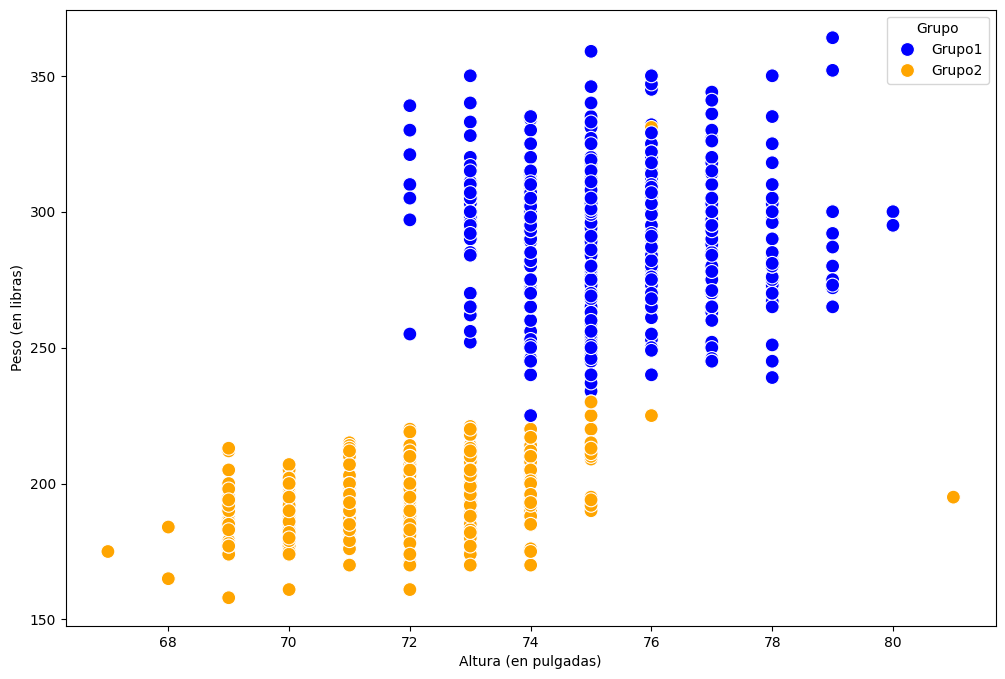

In [ ]:
# Crear el diagrama de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Height (inches)', y='Weight (lbs)', hue='Grupo', palette={'Grupo1': 'blue', 'Grupo2': 'orange'}, s=100, edgecolor='w')

# Configurar el título y las etiquetas
plt.xlabel('Altura (en pulgadas)')
plt.ylabel('Peso (en libras)')
plt.legend(title='Grupo', loc='upper right')

# Mostrar el gráfico
plt.show()

El diagrama de dispersión muestra una separación entre los dos grupos bastante clara. Sin embargo, se observa un punto del Grupo1, resaltado en amarillo, que presenta valores de altura y peso significativamente altos, y que está completamente rodeado por puntos del Grupo2. Además, los puntos situados cerca del límite entre los dos grupos podrían representar un desafío para los algoritmos de clustering.